<a href="https://colab.research.google.com/github/shanmugakumar585/infosys-doctor-patient/blob/main/DISEASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

team 2
1.   .**shanmugakumar** S
2.   **rohit patil**





In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import auth
import pandas as pd
import gspread
from google.auth import default

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Accessing the specific sheet from the Google Sheet URL
worksheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1GMlqR9GryhunJTXNnvhcDQcYWAgJybuBkoTs5PQbp7I/edit?usp=sharing').worksheet('gpt-4')

# Get all values from the worksheet
data = worksheet.get_all_values()

# Convert data to DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

data=df
data = data.astype(str)

print(data.head())

                                                data  \
0  This 60-year-old male was hospitalized due to ...   
1  A 39-year-old man was hospitalized due to an i...   
2  One week after a positive COVID-19 result this...   
3  This 69-year-old male was admitted to the ICU ...   
4  This 57-year-old male was admitted to the ICU ...   

                                        conversation  
0  Doctor: Good morning, how are you feeling toda...  
1  Doctor: Hello, how are you feeling today?\nPat...  
2  Doctor: Hello, how are you feeling today?\nPat...  
3  Doctor: Hello, how are you feeling today?\nPat...  
4  Doctor: Good morning, how are you feeling toda...  


In [ ]:
df=data['data']

In [ ]:
df = df.to_frame(name='data')  # Provide a column name, e.g., 'text_column'


In [ ]:
df.head()

,data
0,This 60-year-old male was hospitalized due to ...
1,A 39-year-old man was hospitalized due to an i...
2,One week after a positive COVID-19 result this...
3,This 69-year-old male was admitted to the ICU ...
4,This 57-year-old male was admitted to the ICU ...


In [ ]:
df.shape

(3377, 11)

In [ ]:
print(type(df))  # If this shows <class 'pandas.core.series.Series'>


<class 'pandas.core.frame.DataFrame'>


In [ ]:
print("Dataset Columns:", df.columns)

Dataset Columns: Index(['data'], dtype='object')


In [ ]:
from nltk.corpus import stopwords
import nltk

# Download stop words (if not already downloaded)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from collections import Counter

stop_words = set(stopwords.words('english'))
all_text = ' '.join(df['data'])

words = re.findall(r'\b\w+\b', all_text.lower())

# Remove stop words
filtered_words = [word for word in words if word not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

# Display the results
print("Top 10 Most Repeated Words (Without Stop Words):")
for word, count in top_10_words:
    print(f"{word}: {count}")

Top 10 Most Repeated Words (Without Stop Words):
patient: 7269
showed: 4008
right: 3836
year: 3805
left: 3789
revealed: 3531
old: 3528
history: 3330
normal: 3225
2: 3165


In [ ]:
top_10_words = word_counts.most_common(50)
for word, count in top_10_words:
    print(f"{word}: {count}")

patient: 7269
showed: 4008
right: 3836
year: 3805
left: 3789
revealed: 3531
old: 3528
history: 3330
normal: 3225
2: 3165
1: 3096
examination: 2978
5: 2631
mg: 2623
blood: 2619
3: 2455
l: 2348
pain: 2343
performed: 2110
presented: 2002
ct: 1935
fig: 1903
0: 1902
4: 1822
mass: 1737
years: 1715
day: 1677
months: 1643
6: 1625
cm: 1574
dl: 1553
hospital: 1503
abdominal: 1467
treatment: 1437
days: 1365
also: 1357
two: 1345
medical: 1343
tumor: 1305
mm: 1299
ml: 1286
10: 1234
without: 1205
chest: 1195
symptoms: 1186
8: 1178
physical: 1162
due: 1158
lower: 1152
7: 1151


In [ ]:
import re
# Define a list of symptoms/diseases to extract
symptoms = ['dyspnea', 'cough', 'fever', 'ARDS', 'pneumonia', 'tachypnea', 'anxiety', 'fatigue']

# Function to extract age from text
def extract_age(text):
    age_match = re.search(r'(\d{2})-year-old', text)
    return int(age_match.group(1)) if age_match else None

# Function to extract symptoms/diseases
def extract_symptoms(text, symptoms_list):
    return {symptom: (symptom.lower() in text.lower()) for symptom in symptoms_list}


In [ ]:
import re
# Define a list of symptoms/diseases to extract
symptoms = ['dyspnea', 'cough', 'fever', 'ARDS', 'pneumonia', 'tachypnea', 'anxiety', 'fatigue']

# Function to extract age from text
def extract_age(text):
    age_match = re.search(r'(\d{2})-year-old', text)
    return int(age_match.group(1)) if age_match else None

# Function to extract symptoms/diseases
def extract_symptoms(text, symptoms_list):
    return {symptom: (symptom.lower() in text.lower()) for symptom in symptoms_list}

# Apply processing to each row in the DataFrame
df['age'] = df['data'].apply(extract_age)
symptom_data = df['data'].apply(lambda x: extract_symptoms(x, symptoms))

# Convert the symptom dictionary into separate columns
symptom_df = pd.DataFrame(symptom_data.tolist())

# Combine the age and symptom data into the original DataFrame
df = pd.concat([df, symptom_df], axis=1)

# Step 4: Visualization of Trends

In [ ]:
def extract_gender(text):
    if re.search(r'\b(male|man)\b', text, re.IGNORECASE):
        return 'Male'
    elif re.search(r'\b(female|woman)\b', text, re.IGNORECASE):
        return 'Female'
    else:
        return 'Unknown'

# Apply the function to create the gender column
df['gender'] = df['data'].apply(extract_gender)

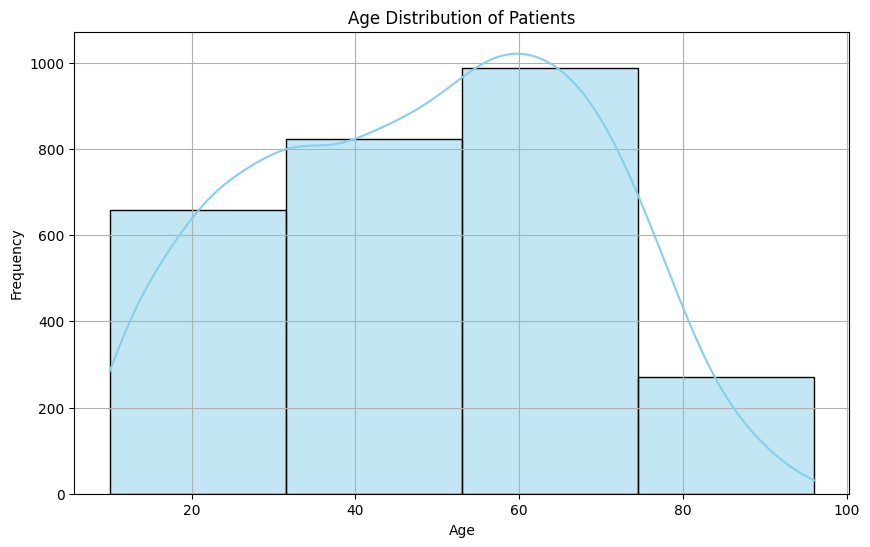

In [ ]:
import matplotlib.pyplot as plt # Import the necessary module and assign it to 'plt'
import seaborn as sns

# Plot Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=4, kde=True, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()





In [ ]:
# Group by age and sum symptoms/diseases
age_bins = [30, 50, 60, 70, 80]
age_labels = ['30-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Aggregate symptoms by age group



In [ ]:
age_group_symptoms = df.groupby('age_group')[symptoms].sum()



<ipython-input-16-e27fed09c8d1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_symptoms = df.groupby('age_group')[symptoms].sum()


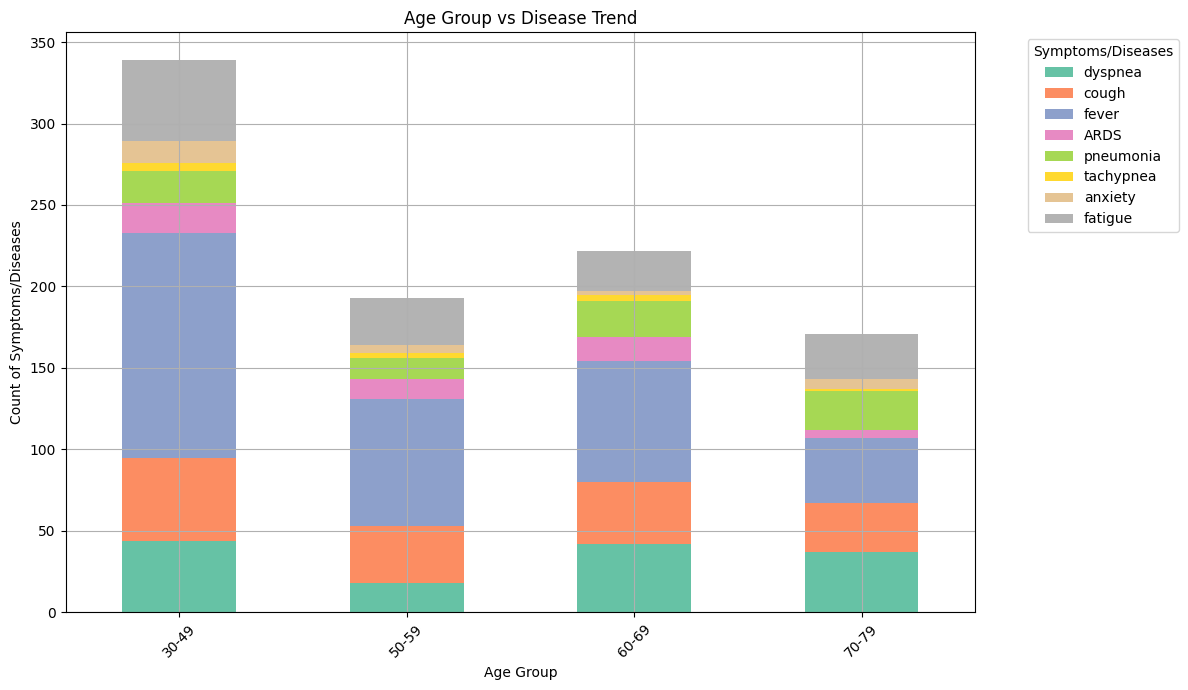

In [ ]:
# Plot Stacked Bar Chart for Age Group vs Disease Trends
age_group_symptoms.plot(kind='bar', stacked=True, figsize=(12, 7), color=sns.color_palette("Set2", len(symptoms)))
plt.title('Age Group vs Disease Trend')
plt.xlabel('Age Group')
plt.ylabel('Count of Symptoms/Diseases')
plt.xticks(rotation=45)
plt.legend(title='Symptoms/Diseases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Print the processed DataFrame
print(df)

                                                   data  \
0     This 60-year-old male was hospitalized due to ...   
1     A 39-year-old man was hospitalized due to an i...   
2     One week after a positive COVID-19 result this...   
3     This 69-year-old male was admitted to the ICU ...   
4     This 57-year-old male was admitted to the ICU ...   
...                                                 ...   
3372  A 50-year-old male presented with complaints o...   
3373  DC, a 51-year-old male, underwent complete res...   
3374  A 69-year-old female patient was diagnosed wit...   
3375  A 76-year-old Caucasian, non-smoking female su...   
3376  A 20-year-old female presented to the emergenc...   

                                           conversation   age  dyspnea  cough  \
0     Doctor: Good morning, how are you feeling toda...  60.0     True   True   
1     Doctor: Hello, how are you feeling today?\nPat...  39.0     True   True   
2     Doctor: Hello, how are you feeling today?\

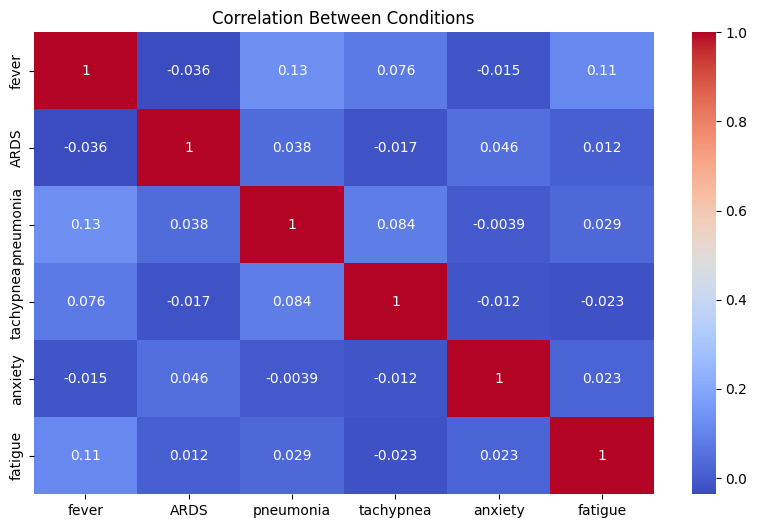

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['fever', 'ARDS', 'pneumonia', 'tachypnea', 'anxiety', 'fatigue']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Conditions')
plt.show()


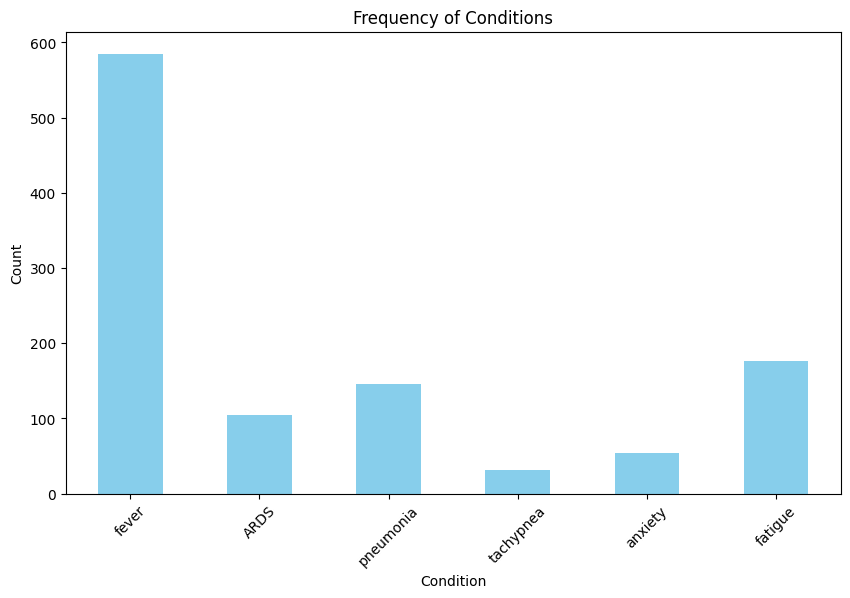

In [ ]:
conditions = ['fever', 'ARDS', 'pneumonia', 'tachypnea', 'anxiety', 'fatigue']
condition_counts = df[conditions].sum()

plt.figure(figsize=(10, 6))
condition_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-21-3815a1cd8e67>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_conditions = df.groupby('age_group')[conditions].sum()


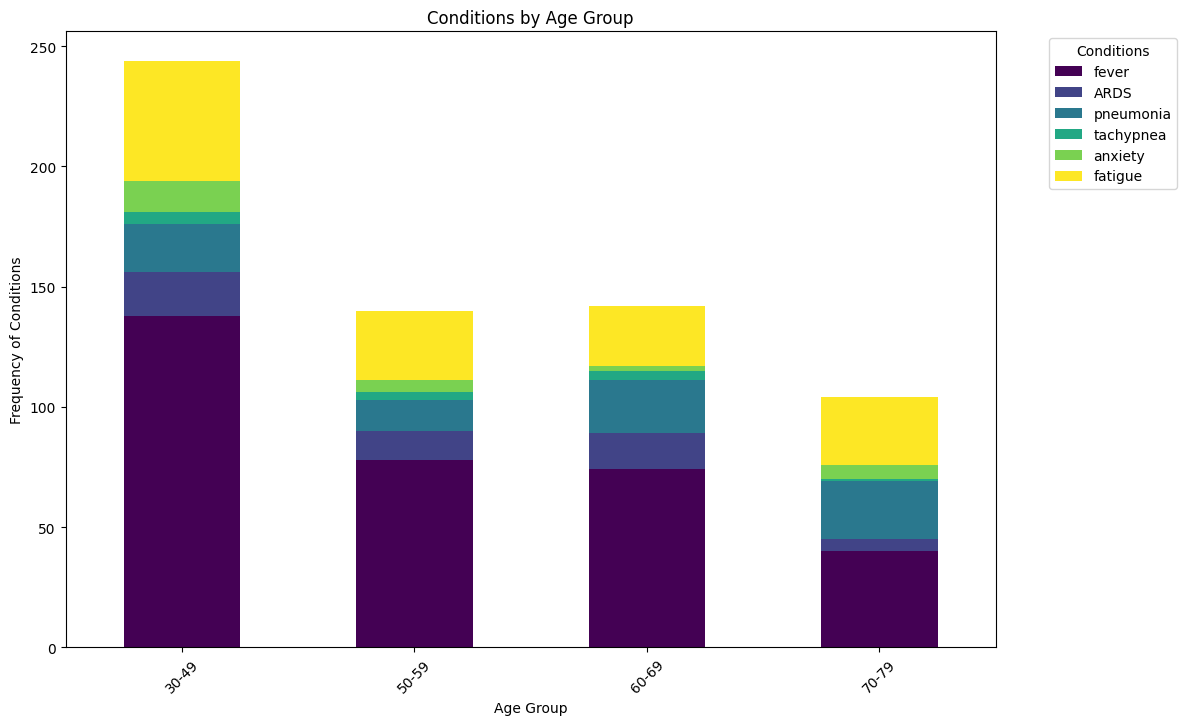

In [ ]:
df_age_conditions = df.groupby('age_group')[conditions].sum()

df_age_conditions.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Conditions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency of Conditions')
plt.xticks(rotation=45)
plt.legend(title='Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

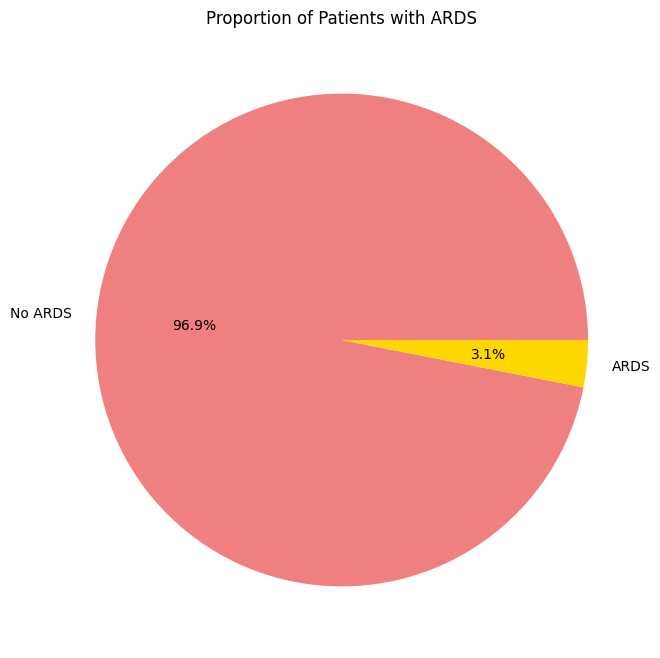

In [ ]:
ards_counts = df['ARDS'].value_counts()

plt.figure(figsize=(8, 8))
ards_counts.plot.pie(autopct='%1.1f%%', labels=['No ARDS', 'ARDS'], colors=['lightcoral', 'gold'])
plt.title('Proportion of Patients with ARDS')
plt.ylabel('')
plt.show()


In [ ]:
df.to_csv('preprocessed_sentiment_analysis.csv', index=False)
